In [34]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
def fetch_price():
    try:
        url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'
        response = requests.get(url)
        data = response.json()
        price = data['bitcoin']['usd']
        return price
    except Exception as e:
        print(f"Error fetching: {e}")
        return None

In [3]:
price_log = pd.DataFrame(columns=['timestamp','price'])

In [4]:
price_log

,timestamp,price


In [5]:
for _ in range(30): #30 values, each fetched in a gap of 10 sec
    now = datetime.now() #current date and time
    price =fetch_price() #calls function which returns price
    if price: #check if price is received from API
        price_log = pd.concat([price_log, pd.DataFrame([[now, price]], columns = ['timestamp','price'])]) #add a new row to the df that we created
        print(f"{now.strftime('%H:%M:%S')} -> ${price}")
    else:
        print(f"{now.strftime('%H:%M:%S')} -> ${price}")
    time.sleep(10)

/var/folders/_r/dvzwkq2d1w93p5j9kgshhdw00000gn/T/ipykernel_29665/1653019355.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  price_log = pd.concat([price_log, pd.DataFrame([[now, price]], columns = ['timestamp','price'])]) #add a new row to the df that we created


21:59:44 -> $119575
21:59:54 -> $119575
22:00:04 -> $119575
22:00:14 -> $119575
22:00:24 -> $119570
22:00:35 -> $119570
22:00:45 -> $119570
Error fetching: 'bitcoin'
22:00:55 -> $None
Error fetching: 'bitcoin'
22:01:05 -> $None
Error fetching: 'bitcoin'
22:01:15 -> $None
Error fetching: 'bitcoin'
22:01:25 -> $None
Error fetching: 'bitcoin'
22:01:35 -> $None
Error fetching: 'bitcoin'
22:01:45 -> $None
22:01:55 -> $119567
22:02:06 -> $119567
22:02:16 -> $119567
22:02:26 -> $119571
22:02:36 -> $119571
22:02:46 -> $119571
Error fetching: 'bitcoin'
22:02:56 -> $None
Error fetching: 'bitcoin'
22:03:06 -> $None
Error fetching: 'bitcoin'
22:03:16 -> $None
Error fetching: 'bitcoin'
22:03:27 -> $None
Error fetching: 'bitcoin'
22:03:37 -> $None
Error fetching: 'bitcoin'
22:03:47 -> $None
22:03:57 -> $119570
22:04:07 -> $119570
22:04:17 -> $119570
22:04:27 -> $119570
22:04:37 -> $119560


In [7]:
price_log

,timestamp,price
0,2025-07-22 21:59:44.337640,119575
0,2025-07-22 21:59:54.499309,119575
0,2025-07-22 22:00:04.623876,119575
0,2025-07-22 22:00:14.739926,119575
0,2025-07-22 22:00:24.861544,119570
0,2025-07-22 22:00:35.001092,119570
0,2025-07-22 22:00:45.145269,119570
0,2025-07-22 22:01:55.863088,119567
0,2025-07-22 22:02:06.000031,119567
0,2025-07-22 22:02:16.136581,119567


In [17]:
price_log['MA_5'] = price_log['price'].rolling(window=5).mean()

In [18]:
price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))

/var/folders/_r/dvzwkq2d1w93p5j9kgshhdw00000gn/T/ipykernel_29665/866790336.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))
/var/folders/_r/dvzwkq2d1w93p5j9kgshhdw00000gn/T/ipykernel_29665/866790336.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))


In [19]:
price_log['zscore']

0    1.339181
0    1.339181
0    1.339181
0    1.339181
0   -0.062287
0   -0.062287
0   -0.062287
0   -0.903168
0   -0.903168
0   -0.903168
0    0.218006
0    0.218006
0    0.218006
0   -0.062287
0   -0.062287
0   -0.062287
0   -0.062287
0   -2.865223
Name: zscore, dtype: float64

In [24]:
price_log['anomaly'] = price_log['zscore'].apply(lambda x: abs(x) > 0.8)

In [25]:
price_log['anomaly']

0     True
0     True
0     True
0     True
0    False
0    False
0    False
0     True
0     True
0     True
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0     True
Name: anomaly, dtype: bool

(array([20291.91666667, 20291.91736111, 20291.91805556, 20291.91875   ,
        20291.91944444]),
 [Text(20291.916666666668, 0, '22 22:00'),
  Text(20291.91736111111, 0, '22 22:01'),
  Text(20291.918055555554, 0, '22 22:02'),
  Text(20291.91875, 0, '22 22:03'),
  Text(20291.919444444444, 0, '22 22:04')])

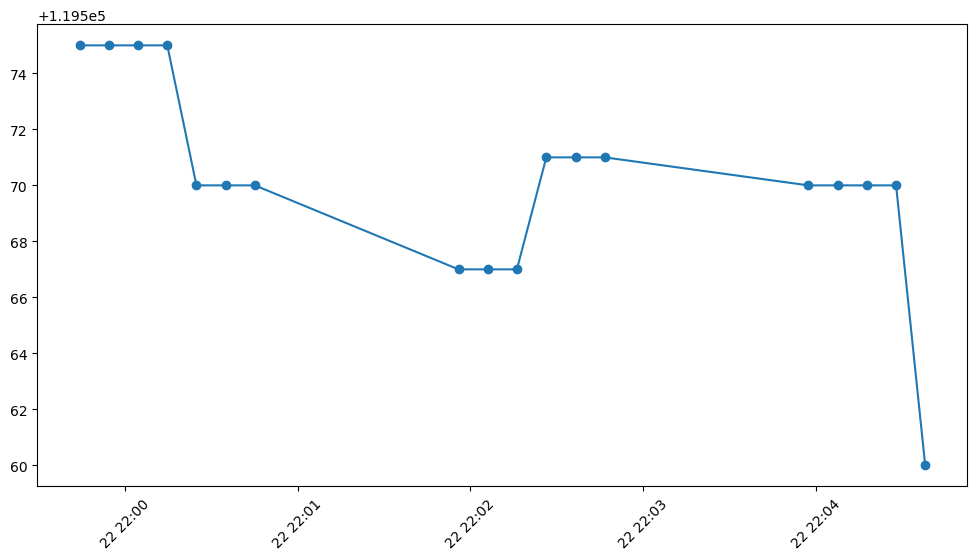

In [20]:
plt.figure(figsize=(12,6))
plt.plot(price_log['timestamp'],price_log['price'],label='Price',marker='o')
plt.xticks(rotation=45)

(array([20291.91701389, 20291.91736111, 20291.91770833, 20291.91805556,
        20291.91840278, 20291.91875   , 20291.91909722, 20291.91944444,
        20291.91979167]),
 [Text(20291.917013888888, 0, '22:00:30'),
  Text(20291.91736111111, 0, '22:01:00'),
  Text(20291.917708333334, 0, '22:01:30'),
  Text(20291.918055555554, 0, '22:02:00'),
  Text(20291.918402777777, 0, '22:02:30'),
  Text(20291.91875, 0, '22:03:00'),
  Text(20291.91909722222, 0, '22:03:30'),
  Text(20291.919444444444, 0, '22:04:00'),
  Text(20291.919791666667, 0, '22:04:30')])

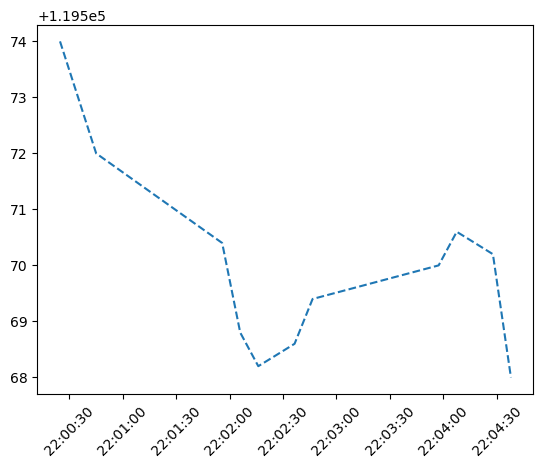

In [22]:
#plt.plot(price_log['timestamp'],price_log['MA_5'],label='Moving Average 5', linestyle = '--')

plt.plot(price_log['timestamp'], price_log['MA_5'], label='Moving Average 5', linestyle='--')
plt.xticks(rotation=45)

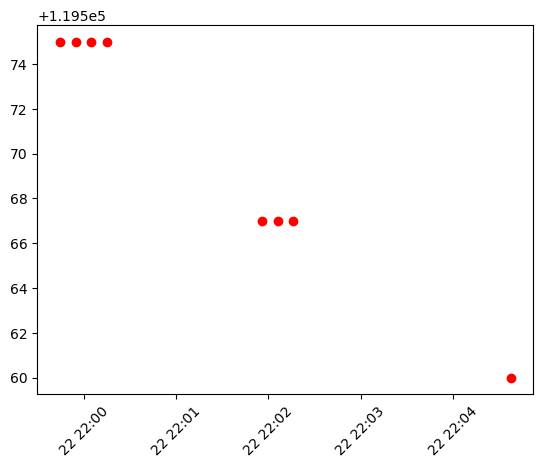

In [29]:
plt.scatter(price_log[price_log['anomaly']]['timestamp'],
           price_log[price_log['anomaly']]['price'],
           color='red', label='anomaly') 
plt.xticks(rotation=45)
plt.show()

In [28]:
price_log[price_log['anomaly']]['price']

0    119575
0    119575
0    119575
0    119575
0    119567
0    119567
0    119567
0    119560
Name: price, dtype: object

/var/folders/_r/dvzwkq2d1w93p5j9kgshhdw00000gn/T/ipykernel_29665/2949042927.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


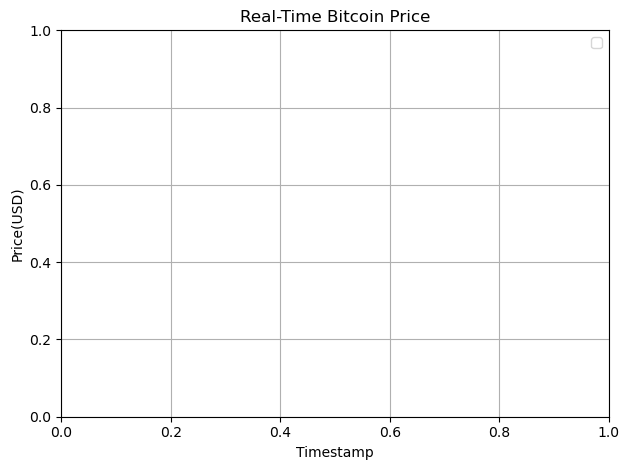

In [36]:
plt.title("Real-Time Bitcoin Price")
plt.xlabel("Timestamp")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/_r/dvzwkq2d1w93p5j9kgshhdw00000gn/T/ipykernel_29665/1333056617.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  decompose = seasonal_decompose(price_log['price'].fillna(method='bfill'), model='additive',period=5)
/var/folders/_r/dvzwkq2d1w93p5j9kgshhdw00000gn/T/ipykernel_29665/1333056617.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  decompose = seasonal_decompose(price_log['price'].fillna(method='bfill'), model='additive',period=5)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


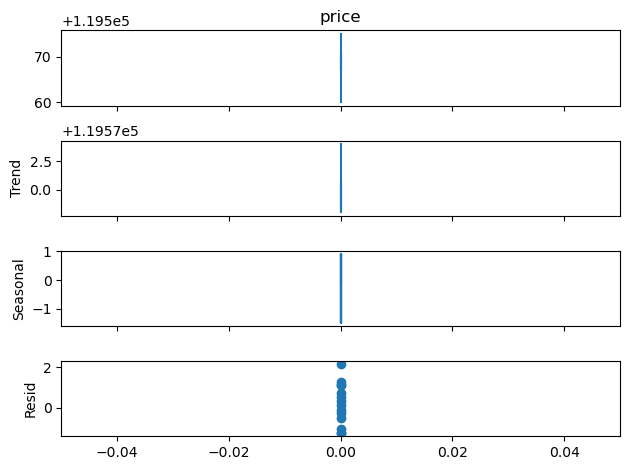

In [37]:
if len(price_log) >= 10:
    try:
        decompose = seasonal_decompose(price_log['price'].fillna(method='bfill'), model='additive',period=5)
        decompose.plot()
        plt.show()
    except Exception as e:
        print(f"Decomposition Failed {e}")

else:
    print("Not enough data")